# Binary files structure
This notebook investigates the structure of the binary `raw` files. The experimental file is in the `./data` directory. The structure of the binary files is:

- events
  - some header
  - the data with characteristic curve

Here is how the experimental file looks like:

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as pp

raw_file = './data/data_2024-01-04_11_12_09_658.raw'        # defining file path

In [33]:
bf = np.fromfile(raw_file, dtype='uint16')                  # loading file, using dtype found in scubeNew.py

In [40]:
def parseStructure(data):
    # function for adding every two bytes together (to read samples)
    result = []     # preparing array
    length = len(data)      # length of given event
    odd = length%2          # is the number of bytes in given event odd? equivalent to boolean (0 or 1)
    for i in range(odd, int(length/2)):         # add every two bytes in event
        # for odd event byte size there are two possibilities how to add the bytes together
        result.append(data[2*i-odd]+data[2*i])      # [0...n-1]
        #result.append(data[2*i]+data[2*i+odd])     # [1...n]
    return result

/tmp/ipykernel_235344/3684782164.py:7: RuntimeWarning: overflow encountered in scalar add
  result.append(data[2*i-odd]+data[2*i])


Text(0.5, 1.0, 'Event number 25, 217 bytes, with header etc.')

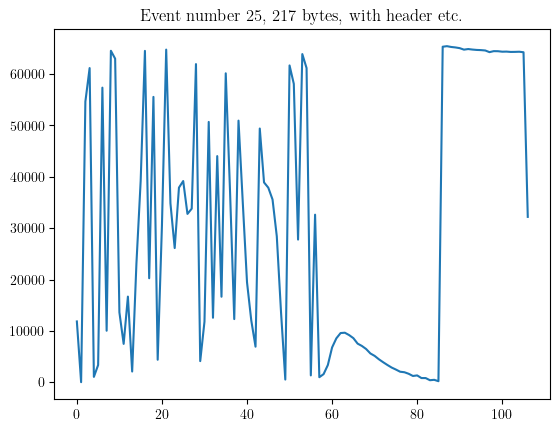

In [43]:
event_length = 217      # setting the event length in bytes
nth_event = 25           # setting which event load
pp.plot(parseStructure(bf[(nth_event-1)*event_length:nth_event*event_length]))      # selecting choosed event with given parameters, done by slicing
pp.title(f'Event number {nth_event}, {event_length} bytes, with header etc.')

The size of events is probably 217 rather than 214, while with 214 the events go out of phase (try etc. `event_length = 214` and `nth_event = 25`. This interval clearly slices two events.)